# Preliminary inspection

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_table('../en.openfoodfacts.org.products.csv', sep='\t')

/home/guillaume/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,3,5,27,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [55]:
data.shape

(80501, 159)

### Manufacturing places for products sold in France

In [45]:
manu = data.ix[(data.countries == 'France') & (~data.manufacturing_places.isnull()), ['manufacturing_places', 'code']].groupby('manufacturing_places').count()
manu = manu.sort_values('code', ascending=False)

In [50]:
manu.shape

(2961, 1)

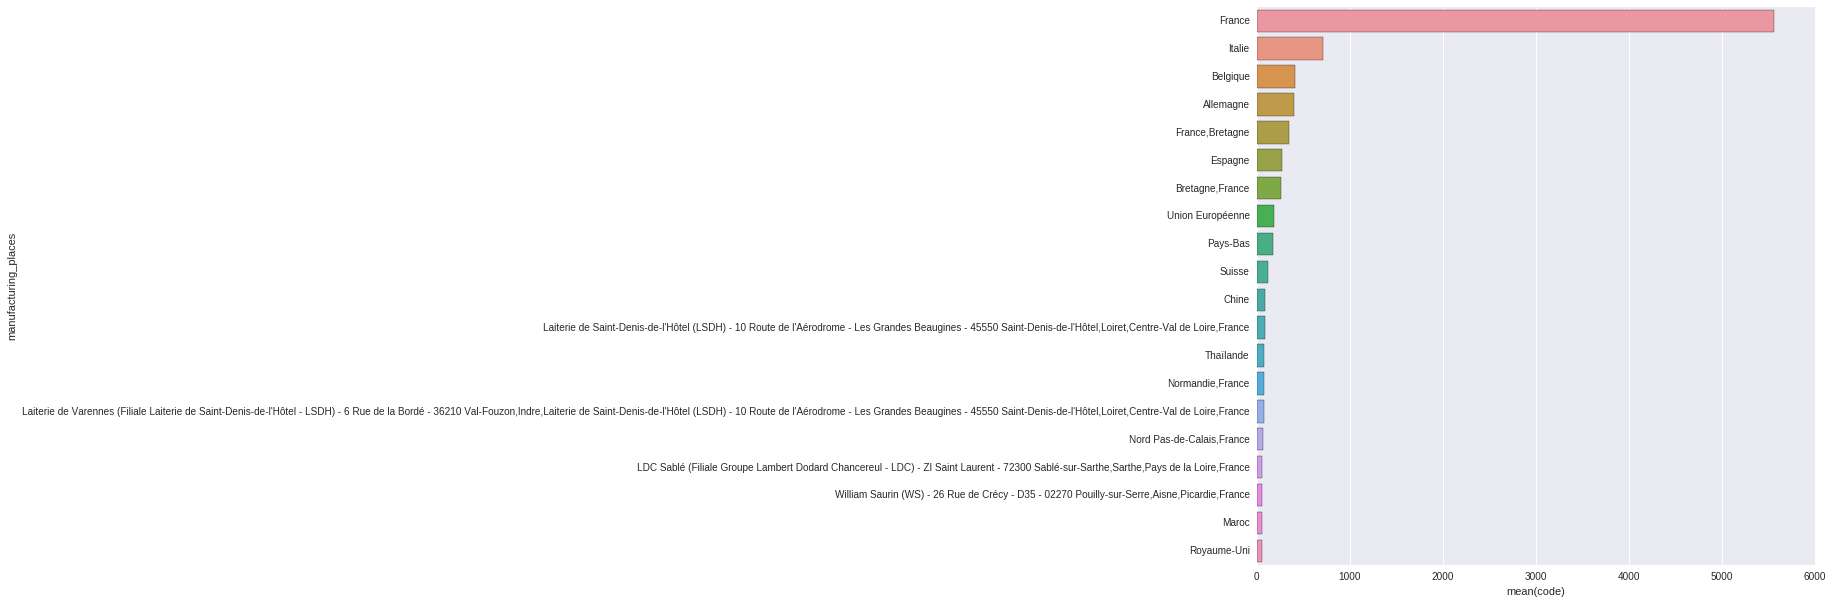

In [53]:
plt.figure(figsize=(10, 10))
sns.barplot(x=manu.head(20).code, y=manu.head(20).index)
#plt.tight_layout()

In [54]:
manu

,code
manufacturing_places,
France,5562
Italie,713
Belgique,409
Allemagne,395
"France,Bretagne",351
Espagne,275
"Bretagne,France",261
Union Européenne,189
Pays-Bas,169


In [29]:
data[["countries", "manufacturing_places"]].groupby('countries').count().sort_values('manufacturing_places', ascending=False)

,manufacturing_places
countries,
France,17100
España,2823
Deutschland,858
Australia,844
United Kingdom,801
Suisse,683
United States,294
Belgique,153
"Belgique,France",84


### Percentage of missing values for each column.

In [31]:
(data.isnull().mean().sort_values() * 100)

last_modified_t                              0.000000
last_modified_datetime                       0.000000
created_t                                    0.003727
created_datetime                             0.008696
code                                         0.023602
url                                          0.023602
creator                                      0.085713
states                                       0.114284
states_tags                                  0.114284
states_en                                    0.114284
countries                                    0.273289
countries_en                                 0.273289
countries_tags                               0.273289
image_small_url                              5.915454
image_url                                    5.915454
product_name                                 9.983727
brands                                      13.562564
brands_tags                                 13.567533
quantity                    

### Most represented countries

In [36]:
data[['countries_en', 'last_modified_t']].groupby('countries_en').count().sort_values('last_modified_t', ascending=False)

,last_modified_t
countries_en,
France,52433
United Kingdom,3974
Spain,3870
Germany,3847
United States,2623
Belgium,2381
Switzerland,2042
Australia,1465
Italy,704
